# Zadanie: Ceny Akcji

## Wczytywanie Danych

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
kghm_url = 'https://raw.githubusercontent.com/konradp-86/kurs/main/kgh_d.csv'
miedz_url = 'https://raw.githubusercontent.com/konradp-86/kurs/main/ca_c_f_d.csv'
kghm_df = pd.read_csv(kghm_url)
miedz_df = pd.read_csv(miedz_url)

## Przygotowanie wykresu z cenami akcji KGHM

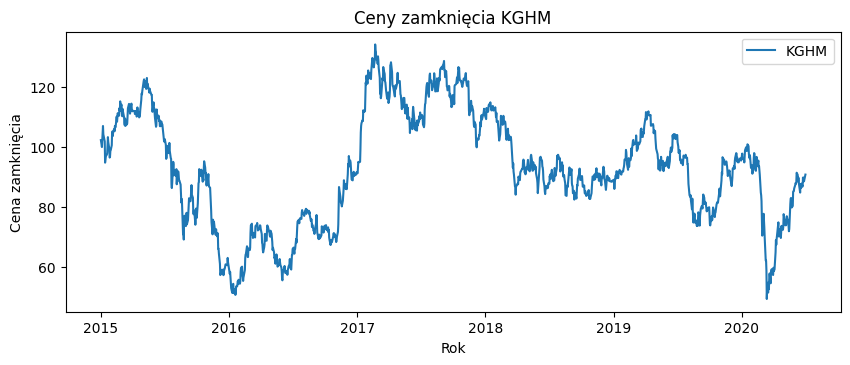

In [26]:
kghm_df['Data'] = pd.to_datetime(kghm_df['Data'])

kghm_df['Year'] = kghm_df['Data'].dt.year

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(kghm_df['Data'], kghm_df['Zamkniecie'], label='KGHM')
plt.title('Ceny zamknięcia KGHM')
plt.xlabel('Rok')
plt.ylabel('Cena zamknięcia')
plt.legend()

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())

plt.show()

## Przygotowanie wykresu z cenami akcji Miedzi

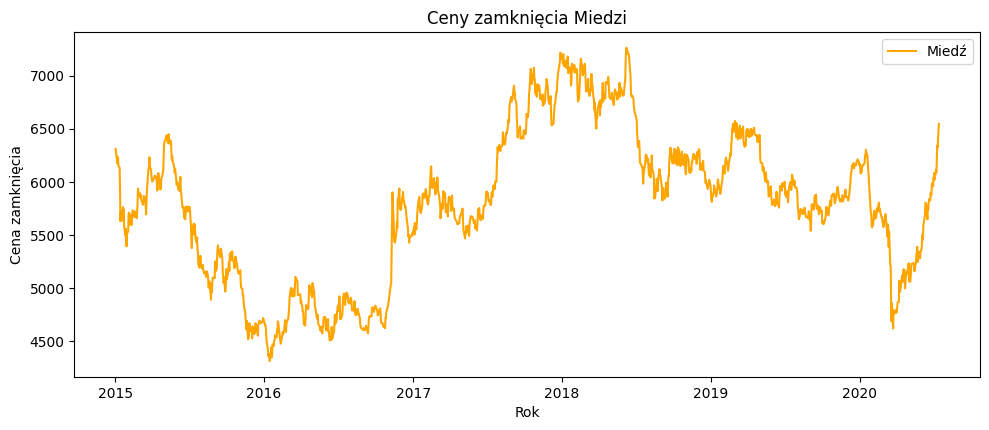

In [47]:
miedz_df['Data'] = pd.to_datetime(miedz_df['Data'])

miedz_df['Year'] = miedz_df['Data'].dt.year

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 2)
plt.plot(miedz_df['Data'], miedz_df['Zamkniecie'], label='Miedź', color='orange')
plt.title('Ceny zamknięcia Miedzi')
plt.xlabel('Rok')
plt.ylabel('Cena zamknięcia')
plt.legend()

plt.tight_layout()
plt.show()

## Przygotowanie zestawienia cen akcji KGHM i Miedzi

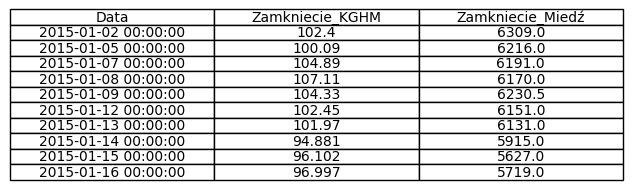

In [37]:
merged_data = pd.merge(kghm_df[['Data', 'Zamkniecie']], miedz_df[['Data', 'Zamkniecie']], on='Data', suffixes=('_KGHM', '_Miedź'))

merged_data_10 = merged_data.head(10)

plt.subplot(3, 1, 3)
plt.axis('off')
table = plt.table(cellText=merged_data_10.values, colLabels=merged_data.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.show()


## Wykres przedstawiający korelacje między cenami akcji Miedzi i KGHM

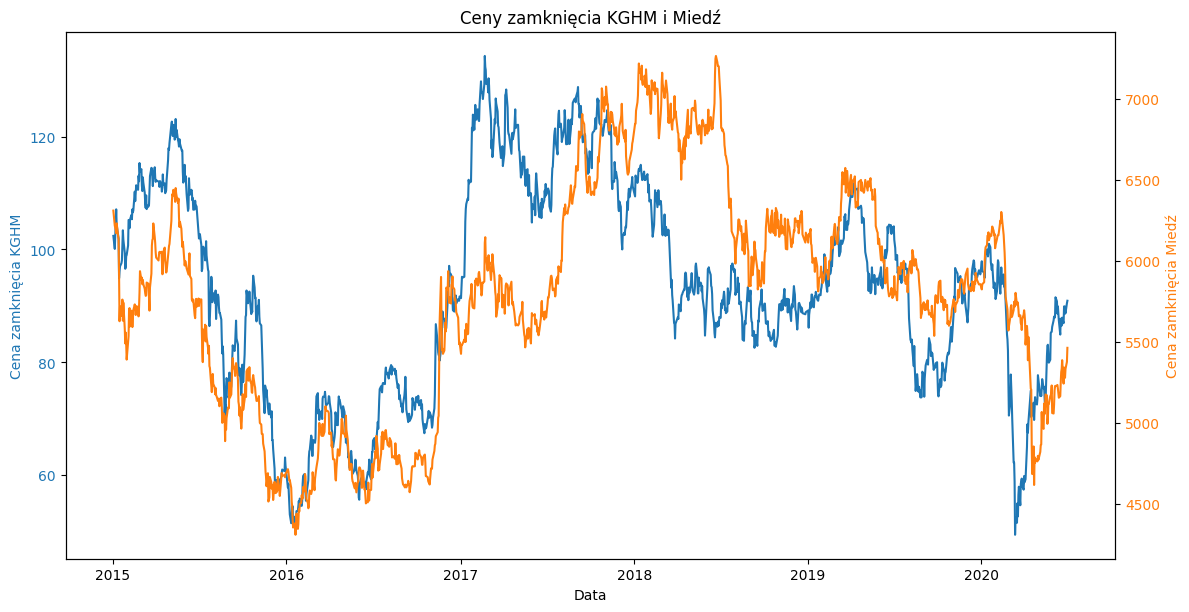

In [38]:
merged_data = pd.merge(kghm_df[['Data', 'Zamkniecie']], miedz_df[['Data', 'Zamkniecie']], on='Data', suffixes=('_KGHM', '_Miedź'))

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Data')
ax1.set_ylabel('Cena zamknięcia KGHM', color=color)
ax1.plot(merged_data['Data'], merged_data['Zamkniecie_KGHM'], label='KGHM', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Utwórz drugą oś, która dzieli oś x z ax1
color = 'tab:orange'
ax2.set_ylabel('Cena zamknięcia Miedź', color=color)
ax2.plot(merged_data['Data'], merged_data['Zamkniecie_Miedź'], label='Miedź', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Dostosuj układ, aby wszystko się zmieściło
plt.title('Ceny zamknięcia KGHM i Miedź')
plt.show()

## Wykres Interaktywny

In [46]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

# Dodaj dane KGHM
fig.add_trace(go.Scatter(x=merged_data['Data'], y=merged_data['Zamkniecie_KGHM'], mode='lines', name='KGHM', line=dict(color='blue')))

# Dodaj dane Miedź
fig.add_trace(go.Scatter(x=merged_data['Data'], y=merged_data['Zamkniecie_Miedź'], mode='lines', name='Miedź', line=dict(color='orange'), yaxis='y2'))

# Ustawienia osi
fig.update_layout(
    title='Ceny zamknięcia KGHM i Miedź',
    xaxis=dict(title='Data', tickformat='%Y-%m', tickangle=90),
    yaxis=dict(title=dict(text='Cena zamknięcia KGHM', font=dict(color='blue')), tickfont=dict(color='blue')),
    yaxis2=dict(title=dict(text='Cena zamknięcia Miedź', font=dict(color='orange')), tickfont=dict(color='orange'), overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.1)
)
fig.show()